# Exercise 15

# Fraud Detection

## Introduction

- Fraud Detection Dataset from Microsoft Azure: [data](http://gallery.cortanaintelligence.com/Experiment/8e9fe4e03b8b4c65b9ca947c72b8e463)

Fraud detection is one of the earliest industrial applications of data mining and machine learning. Fraud detection is typically handled as a binary classification problem, but the class population is unbalanced because instances of fraud are usually very rare compared to the overall volume of transactions. Moreover, when fraudulent transactions are discovered, the business typically takes measures to block the accounts from transacting to prevent further losses. 

In [99]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import fbeta_score
import matplotlib as mpl
import matplotlib.pyplot as plt

In [59]:
import pandas as pd

url = 'https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/15_fraud_detection.csv.zip'
df = pd.read_csv(url, index_col=0)

In [60]:
df.tail()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
138716,1,1,0,0.00,0.0,0.481838,0.644357,4.911509,4.992339,0.000000,4.871556,89.99,89.990000,3.741165,4.962055,0
138717,1,1,0,0.00,0.0,0.593064,0.669050,4.177459,4.331187,0.000000,3.766584,74.36,74.360000,3.220356,4.965339,0
138718,1,1,4,878.06,0.0,5.064533,5.096396,3.772301,2.561447,0.007639,4.022886,19.99,20.896546,3.833875,4.895263,0
138719,1,1,0,0.00,0.0,0.481838,0.481838,3.319765,3.356150,0.000000,3.599593,139.99,139.990000,0.481838,4.876771,0
138720,1,1,0,0.00,0.0,1.066351,1.299283,4.422139,4.497450,0.000000,4.416183,139.99,139.990000,3.126395,5.034622,0


In [61]:
df.shape, df.Label.sum(), df.Label.mean()

((138721, 16), 797, 0.0057453449730033666)

# Exercise 15.1 -> OJO, TODO SOBRE BASE DE ENTRENAMIENTO, SE DEBE PARTIR PRIMERO

Estimate a Logistic Regression and a Decision Tree

Evaluate using the following metrics:
* Accuracy
* F1-Score
* F_Beta-Score (Beta=10)

Comment about the results

In [62]:
# Accuracy debe dar 0.9943
# F_Beta-Score (Beta=10), un falso negativo cuesta 10 veces más que un falso positivo, en el contexto del fraude

In [190]:
#df.describe()

# define X and y
X = df.drop(['Label'], axis=1)
y = df.Label

# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

# train a logistic regression model
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)

# make predictions for testing set
y_pred_class = logreg.predict(X_test)

# calculate F1-Score - Accuracy - F1-Beta LOGREG
print ('Accuracy Logreg =', metrics.accuracy_score(y_pred_class, y_test))
print ('F1-Score Logreg =', metrics.f1_score(y_pred_class, y_test))
print ('F-Beta Score Logreg =', metrics.fbeta_score(y_pred_class, y_test, beta=10))

('Accuracy Logreg =', 0.994112982675349)
('F1-Score Logreg =', 0.0)
('F-Beta Score Logreg =', 0.0)


In [178]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_class = dt.predict(X_test)

# calculate F1-Score - Accuracy - F1-Beta LOGREG
print ('Accuracy DecisionTreeClassifier =', metrics.accuracy_score(y_pred_class, y_test))
print ('F1-Score DecisionTreeClassifier =', metrics.f1_score(y_pred_class, y_test))
print ('F-Beta Score DecisionTreeClassifier =', metrics.fbeta_score(y_pred_class, y_test, beta=10))

('F1-Score DecisionTreeClassifier =', 0.12830188679245283)
('Accuracy DecisionTreeClassifier =', 0.9888987673306582)
('F-Beta Score DecisionTreeClassifier =', 0.11946425465298313)


# Exercise 15.2

Under-sample the negative class using random-under-sampling

Which is parameter for target_percentage did you choose?
How the results change?

**Only apply under-sampling to the training set, evaluate using the whole test set**

In [175]:
n_samples = float(y.shape[0])
n_samples_0 = (y == 0).sum()
n_samples_1 = (y == 1).sum()
prop_1 = (n_samples_1 / float(n_samples))*100
print ('n_samples:',n_samples,'n_samples_0:',n_samples_0,'n_samples_1:',n_samples_1,'Proporcion 1:',prop_1 )


('n_samples:', 138721.0, 'n_samples_0:', 137924, 'n_samples_1:', 797, 'Proporcion 1:', 0.5745344973003367)


In [177]:
def UnderSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_0_new =  n_samples_1 / target_percentage - n_samples_1
    n_samples_0_new_per = n_samples_0_new / n_samples_0

    filter_ = y == 0

    np.random.seed(seed)
    rand_1 = np.random.binomial(n=1, p=n_samples_0_new_per, size=n_samples)
    
    filter_ = filter_ & rand_1
    filter_ = filter_ | (y == 1)
    filter_ = filter_.astype(bool)
    
    return X[filter_], y[filter_]

In [196]:
models = {'Logistic Regression': LogisticRegression(),
          'Decision Tree': DecisionTreeClassifier()}

Metricas = []

for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    X_u, y_u = UnderSampling(X, y, target_percentage, 1)
    X_train, X_test, y_train, y_test = train_test_split(X_u, y_u, test_size=0.30, random_state=1)
    y_pred_new = pd.DataFrame (columns =models.keys(),index= y_test.index )
    for i, model  in models.items():
        model.fit(X_train, y_train)
        y_pred_new[i] = model.predict(X_test) 
    for model in models.keys():
        Metricas.append([model, target_percentage, metrics.accuracy_score(y_pred_new[model], y_test), metrics.f1_score(y_pred_new[model], y_test), metrics.fbeta_score(y_pred_new[model], y_test, beta=10)])
Metricas = pd.DataFrame(Metricas, columns=['Model', 'target_percentage', 'Accuracy', 'F1-Score', 'F-Beta Score'])    
print (Metricas)

                 Model  target_percentage  Accuracy  F1-Score  F-Beta Score
0  Logistic Regression                0.1  0.892917  0.030189      0.244700
1        Decision Tree                0.1  0.863333  0.351779      0.349074
2  Logistic Regression                0.2  0.809683  0.191489      0.531268
3        Decision Tree                0.2  0.782137  0.455115      0.443321
4  Logistic Regression                0.3  0.745223  0.328859      0.703983
5        Decision Tree                0.3  0.705732  0.503226      0.497977
6  Logistic Regression                0.4  0.679727  0.502646      0.708379
7        Decision Tree                0.4  0.695060  0.635438      0.634172
8  Logistic Regression                0.5  0.651261  0.675781      0.641399
9        Decision Tree                0.5  0.668067  0.692607      0.655127


- Se evidencia en Regresión logística el mejor desempeño de sus estimaciones en target_percentage de 40%, según F-Beta Score de 0.708379. Sin embargo, el indicador de F1-Score esta cercano al 0.5, lo cual no es bueno para el modelo.
- Se evidencia en Decision Tree el mejor desempeño de sus estimaciones en target_percentage de 50%, según F-Beta Score de 0.655127.


# Exercise 15.3

Same analysis using random-over-sampling

In [293]:
import random
def OverSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_1_new =  -target_percentage * n_samples_0 / (target_percentage- 1)

    np.random.seed(seed)
    filter_ = np.random.choice(X[y == 1].shape[0], int(n_samples_1_new))
    # filter_ is within the positives, change to be of all
    filter_ = np.nonzero(y == 1)[0][filter_]
    
    filter_ = np.concatenate((filter_, np.nonzero(y == 0)[0]), axis=0)
    
    return X[filter_], y[filter_]

In [294]:
Metricas = []

for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
    X_train, y_train = OverSampling(X.values, y, target_percentage, 1)
    y_pred_new = pd.DataFrame (columns =models.keys(),index= y_test.index )
    for i, model  in models.items():
        model.fit(X_train, y_train)
        y_pred_new[i] = model.predict(X_test) 
    for model in models.keys():
        Metricas.append([model, target_percentage, metrics.accuracy_score(y_pred_new[model], y_test), metrics.f1_score(y_pred_new[model], y_test), metrics.fbeta_score(y_pred_new[model], y_test, beta=10)])
Metricas = pd.DataFrame(Metricas, columns=['Model', 'target_percentage', 'Accuracy', 'F1-Score', 'F-Beta Score'])    
print (Metricas)

                 Model  target_percentage  Accuracy  F1-Score  F-Beta Score
0  Logistic Regression                0.1  0.994017  0.000000      0.000000
1        Decision Tree                0.1  0.999543  0.962672      0.928692
2  Logistic Regression                0.2  0.985343  0.064417      0.051801
3        Decision Tree                0.2  0.999543  0.962672      0.928692
4  Logistic Regression                0.3  0.947401  0.048674      0.027477
5        Decision Tree                0.3  0.999543  0.962672      0.928692
6  Logistic Regression                0.4  0.899152  0.039808      0.021284
7        Decision Tree                0.4  0.999543  0.962672      0.928692
8  Logistic Regression                0.5  0.524257  0.017858      0.009128
9        Decision Tree                0.5  0.999543  0.962672      0.928692


- Se evidencia en Regresión logística en general desempeño muy bajo de los indicadores de F1 Score y Beta Score, siendo el más alto en 20% con 0.0644 de F1-Score y 0.0518 para F-Beta Score.
- Se evidencia en Decision Tree el mejor desempeño de sus estimaciones en target_percentage de 50%, según F-Beta Score de 0.928692.

# Exercise 15.4 (3 points)

Evaluate the results using SMOTE

Which parameters did you choose?

In [267]:
def SMOTE(X, y, target_percentage=0.5, k=5, seed=None):
    
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()
    
    # New samples
    n_samples_1_new =  int(-target_percentage * n_samples_0 / (target_percentage- 1) - n_samples_1)
    
    # A matrix to store the synthetic samples
    new = np.zeros((n_samples_1_new, X.shape[1]))
    
    # Create seeds
    np.random.seed(seed)
    seeds = np.random.randint(1, 1000000, 3)
    
    # Select examples to use as base
    np.random.seed(seeds[0])
    sel_ = np.random.choice(y[y==1].shape[0], n_samples_1_new)
    
    # Define random seeds (2 per example)
    np.random.seed(seeds[1])
    nn__ = np.random.choice(k, n_samples_1_new)
    np.random.seed(seeds[2])
    steps = np.random.uniform(size=n_samples_1_new)  

    # For each selected examples create one synthetic case
    for i, sel in enumerate(sel_):
        # Select neighbor
        nn_ = nn__[i]
        step = steps[i]
        # Create new sample
        new[i, :] = X[y==1][sel] - step * (X[y==1][sel] - X[y==1][nn_])
    
    X = np.vstack((X, new))
    y = np.append(y, np.ones(n_samples_1_new))
    
    return X, y

('Target percentage', 0.25, 'k ', 5)
('y.shape = ', 183898L, 'y.mean() = ', 0.24999728110148017)


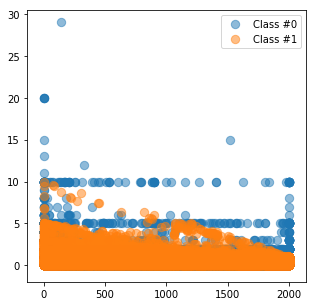

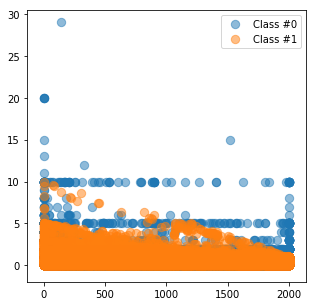

('Target percentage', 0.25, 'k ', 15)
('y.shape = ', 183898L, 'y.mean() = ', 0.24999728110148017)


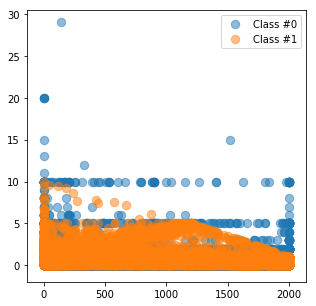

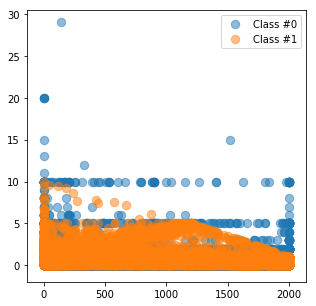

('Target percentage', 0.5, 'k ', 5)
('y.shape = ', 275848L, 'y.mean() = ', 0.5)


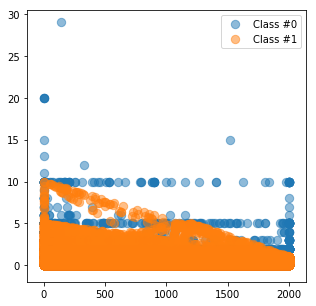

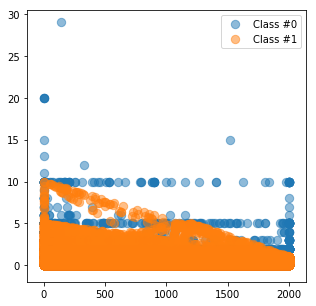

('Target percentage', 0.5, 'k ', 15)
('y.shape = ', 275848L, 'y.mean() = ', 0.5)


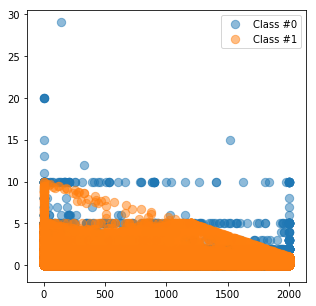

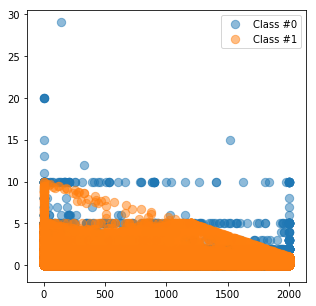

In [281]:
Metricas = []
for target_percentage in [0.25, 0.5]:
    for k in [5, 15]:
        X_smo, y_smo = SMOTE(X.values, y, target_percentage, k, seed=3)
        X_train, X_test, y_train, y_test = train_test_split(X_smo, y_smo, test_size=0.30, random_state=1)
        print('Target percentage', target_percentage, 'k ', k)
        print('y.shape = ',y_smo.shape[0], 'y.mean() = ', y_smo.mean())
        for j, smo  in models.items():
            smo.fit(X_train, y_train)
            y_pred = value.predict(X_test) 
            Metricas.append([j, target_percentage, k, metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test), metrics.fbeta_score(y_pred, y_test, beta=10)])
            plot_two_classes(X_smo, y_smo, size=(5, 5))
            plt.show()  

Metricas = pd.DataFrame(Metricas, columns=['Model', 'target_percentage', 'k', 'Accuracy', 'F1-Score', 'F-Beta Score'])    

In [282]:
print (Metricas)

                 Model  target_percentage   k  Accuracy  F1-Score  \
0  Logistic Regression               0.25   5  0.989324  0.978683   
1        Decision Tree               0.25   5  0.984901  0.969741   
2  Logistic Regression               0.25  15  0.915262  0.802634   
3        Decision Tree               0.25  15  0.980062  0.959933   
4  Logistic Regression               0.50   5  0.986829  0.986675   
5        Decision Tree               0.50   5  0.989825  0.989784   
6  Logistic Regression               0.50  15  0.854244  0.830595   
7        Decision Tree               0.50  15  0.983554  0.983473   

   F-Beta Score  
0      0.973950  
1      0.968534  
2      0.952725  
3      0.961306  
4      0.993269  
5      0.988985  
6      0.981237  
7      0.983531  


- Se evidencia en Regresión logística el mejor desempeño de sus estimaciones en target_percentage de 50% con k=5, según F-Beta Score de 0.993269. Lo cual es muy buen desempeño.
- Se evidencia en Decision Tree el mejor desempeño de sus estimaciones en target_percentage de 50% con k=5, según F-Beta Score de 0.9889.

# Exercise 15.5 (3 points)

Evaluate the results using Adaptive Synthetic Sampling Approach for Imbalanced
Learning (ADASYN)

http://www.ele.uri.edu/faculty/he/PDFfiles/adasyn.pdf
https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.ADASYN.html#rf9172e970ca5-1

In [288]:
# USar Adapsit
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN

Resampled dataset shape Counter({0: 137924, 1: 137810})
()
('Logistic Regression', ':')
('Accuracy =', 0.6567256198546922)
('F1-Score =', 0.6945089938893192)
('F-Beta Score =', 0.629844080611931)
()
('Decision Tree', ':')
('Accuracy =', 0.9891079653292393)
('F1-Score =', 0.989194180928509)
('F-Beta Score =', 0.9872791727148352)


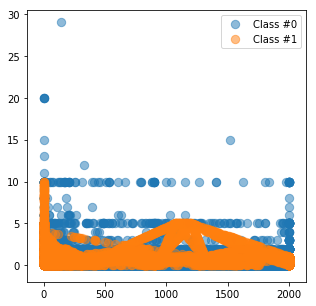

In [291]:
ada = ADASYN(random_state=42)

X_ADASYN, y_ADASYN = ada.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_ADASYN, y_ADASYN, test_size=0.30, random_state=42)
print('Resampled dataset shape %s' % Counter(y_ADASYN))
for i, value  in models.items():
    value.fit(X_train, y_train.ravel())
    y_pred = value.predict(X_test)
    print()
    print(i,':')
    
    # calculate F1-Score - Accuracy - F1-Beta ADASYN
    print ('Accuracy =', metrics.accuracy_score(y_pred, y_test))
    print ('F1-Score =', metrics.f1_score(y_pred, y_test))
    print ('F-Beta Score =', metrics.fbeta_score(y_pred, y_test, beta=10))
plot_two_classes(X_ADASYN, y_ADASYN, size=(5, 5))
plt.show()    

# Exercise 15.6 (3 points)

Compare and comment about the results

Para datos desbalanceados se tiene mejor desempeño en las medidas usando under-sampling logrando resultados cercanos al 0.7 en los indicadores de F1-Score y F-Beta Score, tanto en Logistic Regression como en Decision Tree. 

En cuando a over-sampling el desempeño de los modelos según el resultado de las medidas, es muy malo, en Logistic Regression el máximo alcanzado es de 0.0644 en F1-Score y en Decision Tree el máximo alcanzado es de 0.9626 en F1-Score.

Al realizar el ajuste de los modelos con SMOTE, la mayoría de los valores de las medidas sobrepasan el 0.95, llegando hasta 0.9932 en Logistic Regression y 0.9899 en Decision Tree, hablando en los dos casos del indicador de F-Beta Score.

Con ADASYN se tiene muy buen desempeño de Decision Tree, obteniendo valores por encima de 0.98 en las tres medidas aplicadas Accuracy, F1-Score y F-Beta Score, lo cual habla bien de la metodología.